# 1. Intoduction

In this notebook, presented covid data and supermarket sales data will be read, cleaned and some plots will be created for answering some questions.
This notebook consists of 3 Sections:
* Introduction
* Covid data analysis
* Super market sales data analysis

Covid data analysis consists of:
* Data loading and checking
* Data manipulation, cleaning, and filtering
* Visualisation
* Correlation - Heatmap

Supermarket sales data analysis consists of:
* Data loading and checking
* Data manipulation, cleaning, and filtering
* Visualisation


In [170]:
#all necessary libraries are imported
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.1f}'.format
#to avoid truncation of columns
pd.set_option('display.max_columns', None)


# Conclusion for the introduction section

In this part, required libraries were imported and some adjustments were done to complete assignment


# Covid data analysis

## 1. Data loading and checking
* head()
* tail()
* describe()
* info()

In [171]:
# data is ready to create new dataframe and first 10 rows are shown
covid_df=pd.read_csv('owid-covid-data.csv')
covid_df.head(10)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,0.1,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3,54.4,18.6,2.6,1.3,1804.0,NaN,597.0,9.6,NaN,NaN,37.7,0.5,64.8,0.5,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,0.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3,54.4,18.6,2.6,1.3,1804.0,NaN,597.0,9.6,NaN,NaN,37.7,0.5,64.8,0.5,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,0.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3,54.4,18.6,2.6,1.3,1804.0,NaN,597.0,9.6,NaN,NaN,37.7,0.5,64.8,0.5,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,0.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3,54.4,18.6,2.6,1.3,1804.0,NaN,597.0,9.6,NaN,NaN,37.7,0.5,64.8,0.5,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,0.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3,54.4,18.6,2.6,1.3,1804.0,NaN,597.0,9.6,NaN,NaN,37.7,0.5,64.8,0.5,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2/29/2020,5.0,0.0,0.7,NaN,NaN,NaN,0.1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3,54.4,18.6,2.6,1.3,1804.0,NaN,597.0,9.6,NaN,NaN,37.7,0.5,64.8,0.5,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,3/1/2020,5.0,0.0,0.7,NaN,NaN,NaN,0.1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,54.4,18.6,2.6,1.3,1804.0,NaN,597.0,9.6,NaN,NaN,37.7,0.5,64.8,0.5,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,3/2/2020,5.0,0.0,0.0,NaN,NaN,NaN,0.1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,54.4,18.6,2.6,1.3,1804.0,NaN,597.0,9.6,NaN,NaN,37.7,0.5,64.8,0.5,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,3/3/2020,5.0,0.0,0.0,NaN,NaN,NaN,0.1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [172]:
#last 20 rows are shown
covid_df.tail(20)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
238683,ZWE,Africa,Zimbabwe,11/10/2022,257893.0,0.0,0.0,5606.0,0.0,0.0,15801.7,0.0,0.0,343.5,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,19.6,2.8,1.9,1899.8,21.4,307.8,1.8,1.6,30.7,36.8,1.7,61.5,0.6,16320539.0,NaN,NaN,NaN,NaN
238684,ZWE,Africa,Zimbabwe,11/11/2022,257893.0,0.0,0.0,5606.0,0.0,0.0,15801.7,0.0,0.0,343.5,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,19.6,2.8,1.9,1899.8,21.4,307.8,1.8,1.6,30.7,36.8,1.7,61.5,0.6,16320539.0,NaN,NaN,NaN,NaN
238685,ZWE,Africa,Zimbabwe,11/12/2022,257893.0,0.0,0.0,5606.0,0.0,0.0,15801.7,0.0,0.0,343.5,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,19.6,2.8,1.9,1899.8,21.4,307.8,1.8,1.6,30.7,36.8,1.7,61.5,0.6,16320539.0,NaN,NaN,NaN,NaN
238686,ZWE,Africa,Zimbabwe,11/13/2022,257893.0,0.0,0.0,5606.0,0.0,0.0,15801.7,0.0,0.0,343.5,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,19.6,2.8,1.9,1899.8,21.4,307.8,1.8,1.6,30.7,36.8,1.7,61.5,0.6,16320539.0,NaN,NaN,NaN,NaN
238687,ZWE,Africa,Zimbabwe,11/14/2022,257893.0,0.0,0.0,5606.0,0.0,0.0,15801.7,0.0,0.0,343.5,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,19.6,2.8,1.9,1899.8,21.4,307.8,1.8,1.6,30.7,36.8,1.7,61.5,0.6,16320539.0,NaN,NaN,NaN,NaN
238688,ZWE,Africa,Zimbabwe,11/15/2022,257893.0,0.0,0.0,5606.0,0.0,0.0,15801.7,0.0,0.0,343.5,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,19.6,2.8,1.9,1899.8,21.4,307.8,1.8,1.6,30.7,36.8,1.7,61.5,0.6,16320539.0,NaN,NaN,NaN,NaN
238689,ZWE,Africa,Zimbabwe,11/16/2022,257893.0,0.0,0.0,5606.0,0.0,0.0,15801.7,0.0,0.0,343.5,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,19.6,2.8,1.9,1899.8,21.4,307.8,1.8,1.6,30.7,36.8,1.7,61.5,0.6,16320539.0,NaN,NaN,NaN,NaN
238690,ZWE,Africa,Zimbabwe,11/17/2022,257893.0,0.0,0.0,5606.0,0.0,0.0,15801.7,0.0,0.0,343.5,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,19.6,2.8,1.9,1899.8,21.4,307.8,1.8,1.6,30.7,36.8,1.7,61.5,0.6,16320539.0,NaN,NaN,NaN,NaN
238691,ZWE,Africa,Zimb

In [173]:
#general information about dataypes and other parameters are shown via info() method
covid_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238703 entries, 0 to 238702
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    238703 non-null  object 
 1   continent                                   225250 non-null  object 
 2   location                                    238703 non-null  object 
 3   date                                        238703 non-null  object 
 4   total_cases                                 225237 non-null  float64
 5   new_cases                                   224967 non-null  float64
 6   new_cases_smoothed                          223768 non-null  float64
 7   total_deaths                                205893 non-null  float64
 8   new_deaths                                  205810 non-null  float64
 9   new_deaths_smoothed                         204626 non-null  float64
 

In [174]:
# then via using describe() method some values are shown such as mean value
covid_df.describe()


,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,225237.0,224967.0,223768.0,205893.0,205810.0,204626.0,224210.0,223940.0,222746.0,204879.0,204796.0,203617.0,177581.0,32229.0,32229.0,36173.0,36173.0,8135.0,8135.0,19207.0,19207.0,79387.0,75403.0,79387.0,75403.0,103965.0,103965.0,95927.0,94348.0,68001.0,64994.0,62342.0,37417.0,56391.0,140612.0,68001.0,64994.0,62342.0,37417.0,140612.0,140142.0,140142.0,177373.0,208319.0,192703.0,190670.0,191695.0,192212.0,125218.0,192164.0,202133.0,145613.0,143620.0,94664.0,171157.0,219311.0,187613.0,237676.0,7992.0,7992.0,8043.0,7992.0
mean,4711533.6,12189.1,12215.8,75919.7,133.9,134.6,64309.6,186.3,186.6,709.1,1.4,1.4,0.9,760.9,19.3,3949.3,155.1,424.5,16.6,4824.4,116.9,21104573.9,67285.4,924.3,3.3,142178.4,2.8,0.1,2403.6,300202722.3,136684527.7,119596214.6,65689185.4,896768.0,376716.1,105.7,48.3,43.2,27.8,2420.5,140538.9,0.1,46.2,456.2,30.6,8.8,5.5,19530.4,13.6,261.5,8.4,10.7,32.8,50.9,3.1,73.6,0.7,141121671.4,49249.0,10.0,14.2,1385.5
std,29309880.6,84114.5,82108.1,389206.9,716.1,701.8,112343.5,1158.9,688.5,992.0,5.0,3.3,0.4,2327.2,25.0,10161.8,182.1,629.1,47.6,11998.1,343.2,84098694.3,247734.0,2195.4,9.0,1138214.7,7.3,0.1,33443.7,1216824406.5,554586949.9,498014204.2,255990686.8,3544684.7,2251184.0,80.4,30.0,29.5,26.7,3444.0,917469.8,0.2,23.2,2104.0,9.1,6.1,4.2,20531.6,20.0,120.2,4.7,10.6,13.5,31.9,2.6,7.4,0.1,693221644.9,135646.8,13.4,26.1,1760.4
min,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,15.1,1.1,0.5,661.2,0.1,79.4,1.0,0.1,7.7,1.2,0.1,53.3,0.4,47.0,-37726.1,-28.4,-95.9,-1984.3
25%,4866.0,0.0,5.6,116.0,0.0,0.0,1159.9,0.0,1.2,31.3,0.0,0.0,0.7,29.0,3.5,203.0,36.4,35.0,3.2,292.0,30.8,364654.0,2244.0,43.6,0.3,1486.0,0.2,0.0,7.1,1283096.0,727441.8,599985.8,142239.0,3975.5,568.0,28.5,19.4,12.9,1.6,289.0,130.0,0.0,27.8,37.3,22.3,3.5,2.1,4449.9,0.6,170.1,5.3,1.9,21.6,20.9,1.3,69.5,0.6,896007.0,46.5,0.7,0.0,33.7
50%,54102.0,48.0,88.5,1244.0,1.0,1.4,11276.6,6.5,18.1,223.4,0.0,0.2,1.0,133.0,9.3,782.0,94.0,173.0,7.4,1026.0,72.6,2067330.0,8783.0,234.1,1.0,6570.0,0.9,0.1,17.5,9289238.0,4707497.0,4133151.5,2853121.0,30548.0,6011.0,102.6,56.0,47.5,21.7,1158.0,1672.0,0.0,45.4,87.3,30.6,6.7,4.0,12951.8,2.2,244.0,7.2,6.3,33.1,49.8,2.5,75.0,0.7,6948395.0,6272.6,7.6,7.4,838.5
75%,559034.0,916.0,1087.7,10239.0,13.0,15.0,76806.3,92.7,131.4,1052.1,0.9,1.3,1.1,530.0,25.3,3045.0,201.0,549.0,16.9,4555.0,133.8,10248451.5,37229.0,894.4,2.9,32205.0,2.6,0.1,54.6,61822294.0,29121368.8,26923728.8,18528999.0,231013.0,45181.8,169.8,75.0,69.5,50.2,3312.2,15326.0,0.1,64.8,214.2,39.1,14.2,8.7,27936.9,21.4,32

In [175]:
# we can also describe some values of columns having object datatype as following
covid_df.describe(include='O')


,iso_code,continent,location,date,tests_units
count,238703,225250,238703,238703,106788
unique,248,6,248,1064,4
top,ARG,Europe,Argentina,9/14/2021,tests performed
freq,1064,54729,1064,247,80099


#  Conclusion for the first section

In this section , firstly file in csv format was read into a pandas dataframe, then first 10 and last 20 rows were shown. After this, by using .info() method information about the datatypes of each column was obtained. Finally with the help of .describe() function we acquired dataframe showing values such as mean, minimum, maximum and etc. then we again used describe function to get information about some key features of columns having object datatype. 


## 2. Data manipulation, cleaning and filtering

* can be done based on :
    * rows
    * columns

## 2.1 Checkhing and Fixing anomalies

* value_counts()

In [176]:
# it is seen that all continents have been displayed and all of them are in correct form
covid_df["continent"].value_counts()


Europe           54729
Africa           54213
Asia             50407
North America    35987
Oceania          16900
South America    13014
Name: continent, dtype: int64

In [177]:
# but there is a problem in location column, some inappropriate country names have been included such as 'low income' , 'Africa' and etc., all those rows will be deleted to make analysis reasonable
covid_df['location'].value_counts()


Argentina          1064
Mexico             1064
Thailand           1061
Taiwan             1049
High income        1043
                   ... 
Niue                472
Palau               465
Pitcairn            441
Northern Cyprus     317
Western Sahara        1
Name: location, Length: 248, dtype: int64

In [178]:
# more detailed data
covid_df["location"].unique()


array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswat

In [179]:
#those rows will be deleted via drop() method
list_of_anomalies=['Africa','Asia','Europe','European Union','High income','Low income','International','Lower middle income','North America',"Oceania", 'South Africa', 'South America', 'Upper middle income','World']

index_of_anomalies=covid_df[covid_df["location"].isin(list_of_anomalies)].index
# now we can drop those rows
covid_df.drop(index_of_anomalies,axis=0,inplace=True)


## 2.2 Filtering out columns

As there are some unnecessary columns, our main objective is:
* selecting columns of interest

In [180]:
names_of_column = ['continent','location','date','total_cases','new_cases','new_deaths','total_deaths','hospital_beds_per_thousand','life_expectancy','human_development_index','population','male_smokers','female_smokers']


In [181]:
covid_df[names_of_column]


,continent,location,date,total_cases,new_cases,new_deaths,total_deaths,hospital_beds_per_thousand,life_expectancy,human_development_index,population,male_smokers,female_smokers
0,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,0.5,64.8,0.5,41128772.0,NaN,NaN
1,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,0.5,64.8,0.5,41128772.0,NaN,NaN
2,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,0.5,64.8,0.5,41128772.0,NaN,NaN
3,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,0.5,64.8,0.5,41128772.0,NaN,NaN
4,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,0.5,64.8,0.5,41128772.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238698,Africa,Zimbabwe,11/25/2022,257893.0,0.0,0.0,5606.0,1.7,61.5,0.6,16320539.0,30.7,1.6
238699,Africa,Zimbabwe,11/26/2022,257893.0,0.0,0.0,5606.0,1.7,61.5,0.6,16320539.0,30.7,1.6
238700,Africa,Zimbabwe,11/27/2022,257893.0,0.0,0.0,5606.0,1.7,61.5,0.6,16320539.0,30.7,1.6
238701,Africa,Zimbabwe,11/28/2022,257893.0,0.0,0.0,5606.0,1.7,61.5,0.6,16320539.0,30.7,1.6


In [182]:
#via using filter method we can use these columns and remove remaining ones
covid_df=covid_df.filter(names_of_column)


In [183]:
#first five rows are shown
covid_df.head()


,continent,location,date,total_cases,new_cases,new_deaths,total_deaths,hospital_beds_per_thousand,life_expectancy,human_development_index,population,male_smokers,female_smokers
0,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,0.5,64.8,0.5,41128772.0,NaN,NaN
1,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,0.5,64.8,0.5,41128772.0,NaN,NaN
2,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,0.5,64.8,0.5,41128772.0,NaN,NaN
3,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,0.5,64.8,0.5,41128772.0,NaN,NaN
4,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,0.5,64.8,0.5,41128772.0,NaN,NaN


## 2.3 Checking and fixing the datatype of column

In [184]:
covid_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 224223 entries, 0 to 238702
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   continent                   224223 non-null  object 
 1   location                    224223 non-null  object 
 2   date                        224223 non-null  object 
 3   total_cases                 210791 non-null  float64
 4   new_cases                   210515 non-null  float64
 5   new_deaths                  191398 non-null  float64
 6   total_deaths                191654 non-null  float64
 7   hospital_beds_per_thousand  169087 non-null  float64
 8   life_expectancy             217241 non-null  float64
 9   human_development_index     185543 non-null  float64
 10  population                  224223 non-null  float64
 11  male_smokers                141550 non-null  float64
 12  female_smokers              143543 non-null  float64
dtypes: float64(10)

In [185]:
# as it is seen date column must be converted to date format
covid_df['date']=pd.to_datetime(covid_df['date'])


In [186]:
# now it is converted
covid_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 224223 entries, 0 to 238702
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   continent                   224223 non-null  object        
 1   location                    224223 non-null  object        
 2   date                        224223 non-null  datetime64[ns]
 3   total_cases                 210791 non-null  float64       
 4   new_cases                   210515 non-null  float64       
 5   new_deaths                  191398 non-null  float64       
 6   total_deaths                191654 non-null  float64       
 7   hospital_beds_per_thousand  169087 non-null  float64       
 8   life_expectancy             217241 non-null  float64       
 9   human_development_index     185543 non-null  float64       
 10  population                  224223 non-null  float64       
 11  male_smokers                141550 non-

## 2.4 Checking duplicates

Following methods must be used:

* .duplicated()
* .duplicated().sum()

In [187]:
covid_df.duplicated().sum()


0

In [188]:
# No duplicates found - everything is okay
covid_df.duplicated(subset=['date','location']).sum()


0

## 2.5 Checking missing values

Following methods can be utilized:
* .isnull()    
* .isnull().sum()


In [189]:
#show first 5 rows
covid_df.head()


,continent,location,date,total_cases,new_cases,new_deaths,total_deaths,hospital_beds_per_thousand,life_expectancy,human_development_index,population,male_smokers,female_smokers
0,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.5,64.8,0.5,41128772.0,NaN,NaN
1,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,0.5,64.8,0.5,41128772.0,NaN,NaN
2,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,0.5,64.8,0.5,41128772.0,NaN,NaN
3,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,0.5,64.8,0.5,41128772.0,NaN,NaN
4,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,0.5,64.8,0.5,41128772.0,NaN,NaN


In [190]:
#summation of the number of NaN values
covid_df.isnull().sum()


continent                         0
location                          0
date                              0
total_cases                   13432
new_cases                     13708
new_deaths                    32825
total_deaths                  32569
hospital_beds_per_thousand    55136
life_expectancy                6982
human_development_index       38680
population                        0
male_smokers                  82673
female_smokers                80680
dtype: int64

## How to deal with missing values?

* deleting it
* imputation
    
    * special value imputation
    * mean imputation
    *last observation carried forward/backward
* leave it as it is for now


In [191]:
covid_df.fillna(method='backfill',inplace=True)


In [192]:
# we used backward filling and filled NaN values with numbers
covid_df.head(30) #showing first 5 rows


,continent,location,date,total_cases,new_cases,new_deaths,total_deaths,hospital_beds_per_thousand,life_expectancy,human_development_index,population,male_smokers,female_smokers
0,Asia,Afghanistan,2020-02-24,5.0,5.0,1.0,1.0,0.5,64.8,0.5,41128772.0,51.2,7.1
1,Asia,Afghanistan,2020-02-25,5.0,0.0,1.0,1.0,0.5,64.8,0.5,41128772.0,51.2,7.1
2,Asia,Afghanistan,2020-02-26,5.0,0.0,1.0,1.0,0.5,64.8,0.5,41128772.0,51.2,7.1
3,Asia,Afghanistan,2020-02-27,5.0,0.0,1.0,1.0,0.5,64.8,0.5,41128772.0,51.2,7.1
4,Asia,Afghanistan,2020-02-28,5.0,0.0,1.0,1.0,0.5,64.8,0.5,41128772.0,51.2,7.1
5,Asia,Afghanistan,2020-02-29,5.0,0.0,1.0,1.0,0.5,64.8,0.5,41128772.0,51.2,7.1
6,Asia,Afghanistan,2020-03-01,5.0,0.0,1.0,1.0,0.5,64.8,0.5,41128772.0,51.2,7.1
7,Asia,Afghanistan,2020-03-02,5.0,0.0,1.0,1.0,0.5,64.8,0.5,41128772.0,51.2,7.1
8,Asia,Afghanistan,2020-03-03,5.0,0.0,1.0,1.0,0.5,64.8,0.5,41128772.0,51.2,7.1
9,Asia,Afghanistan,2020-03-04,5.0,0.0,1.0,1.0,0.5,64.8,0.5,41128772.0,51.2,7.1


In [193]:
#we replaced all NaN values
covid_df.isnull().sum()


continent                     0
location                      0
date                          0
total_cases                   0
new_cases                     0
new_deaths                    0
total_deaths                  0
hospital_beds_per_thousand    0
life_expectancy               0
human_development_index       0
population                    0
male_smokers                  0
female_smokers                0
dtype: int64

# Conclusion for the second part 

In this part, we mainly did filtering , cleaning of data and fixed anomalies in the columns' data. 


* **Section 3.1** - we see there is irrelevant data in 'location' column , so we used .unique() method to show each different data in that column. Then, by creating a list of anomalies and using .drop() method we deleted those data to make our visualisations perfect. 



* **Section 3.2** -  As it is very necessary to choose appropriate columns for plotting data, we did filtering bu creating list of columns of interest and using .filter() method to create new dataframe.


* **Section 3.3** - It is very essential to shift the datatype of columns to appropriate format to plot graphs. In our dataframe, 'date' column was initally in 'object' datatype, so used .to_datetime() method change our datatype to 'date' format. 


* **Section 3.4** - Here , we checked if there are any duplicate rows. To do this, we use .duplicated().sum() method to show the number of duplicates. We found that, there was no duplicate values present. 



* **Section 3.5**- In this section, we mainly did work around dealing with missing values. Firstly, we used .isnull().sum() method to see how many missing values we do have in each column. So then using .fillna() and using 'backfill' method to fix NaN values. After this , we again used .isnull().sum() method to see whether NaN values were fixed and we saw that there was no missing values in columns

# 3. Visualisation

Following plot types will be utilized:

* Bar plot
* Horizontal bar plot
* Line plot
* Pie plot

## 3.1 - Question 1

Which countries had the most number of total deaths throughout the given period in each continent?

In [194]:
df_death=covid_df.groupby(['continent']).max()[['total_deaths']]

df_death # this dataframe shows the maximum number of deaths recorded in each continent during the given period


,total_deaths
continent,
Africa,29268.0
Asia,530620.0
Europe,384044.0
North America,1079870.0
Oceania,16124.0
South America,689665.0


In [195]:
#to add country relevant countries to dataframe we first need to create new list and use for loop to fill that list with corresponding countries
continent_list=["Africa","Asia","Europe","North America","Oceania","South America"]
number_list=[0,1,2,3,4,5]
country_list=[]
for i,k in zip(continent_list,number_list):
    # after each loop corresponding country having most number of death record in the certain continents will be added to new list
    country_list+=[covid_df[(covid_df['continent']==i) & (covid_df["total_deaths"]==df_death['total_deaths'][k])].iloc[0][1]]
df_death['Country']=country_list
df_death_max=df_death[['Country','total_deaths']] #to change order of columns for better understanding
df_death_max


,Country,total_deaths
continent,,
Africa,Tunisia,29268.0
Asia,India,530620.0
Europe,Russia,384044.0
North America,United States,1079870.0
Oceania,Australia,16124.0
South America,Brazil,689665.0


## 3.2 - Question 2

What was the numnber of total cases in each continent?

In [196]:
df_cases_total=covid_df.groupby('continent').sum()[['new_cases']]
df_cases_total.rename(columns={"new_cases":"total_cases"},inplace=True)


In [197]:
#total sum of cases in the world 
df_cases_total.sum()


total_cases   637777149.0
dtype: float64

In [198]:
# for better visualisation it is important to sort values in dataframe
df_cases_total.sort_values(['total_cases'],ascending=True,inplace=True)
df_cases_total


,total_cases
continent,
Africa,8384366.0
Oceania,13099557.0
South America,64906007.0
North America,116891303.0
Asia,193835841.0
Europe,240660075.0


In [199]:
#available styles to make visualisations better
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## 3.2.1 - Bar plot

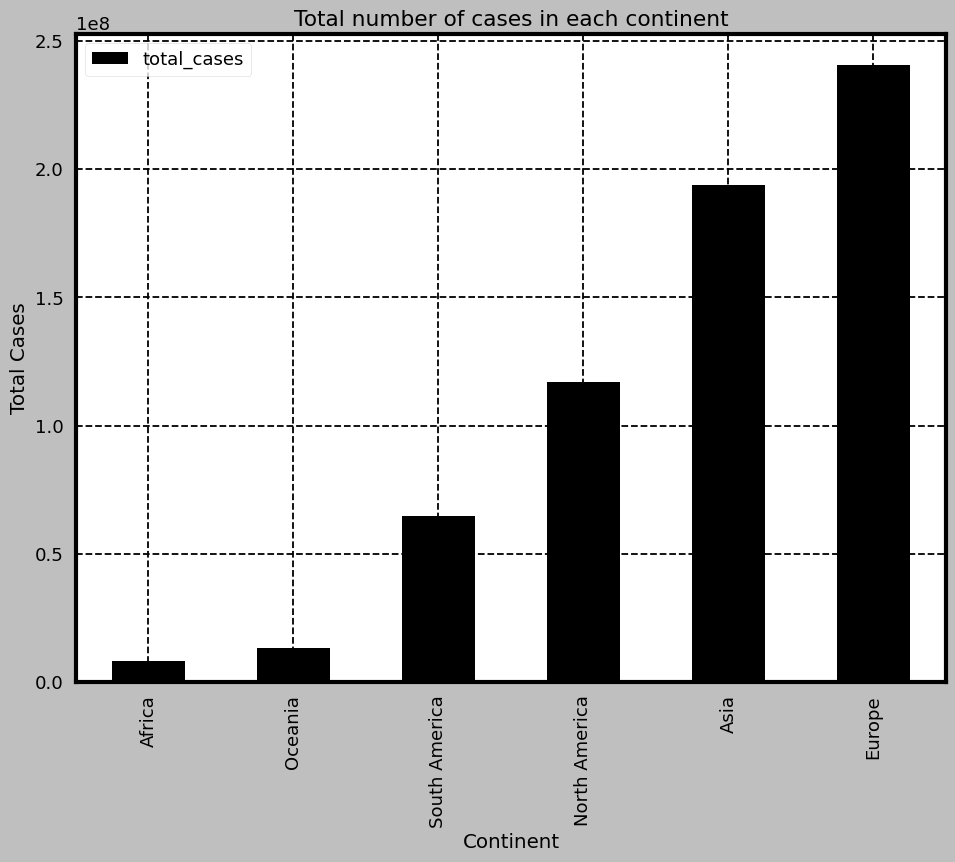

In [200]:
# let's plot bar graph
#adjusting font size
plt.style.use('seaborn-talk')
plt.rcParams.update({'font.size': 15})
bar_chart=df_cases_total.plot.bar(figsize=(10,8),align='center')
#setting  appropriate labels 
bar_chart.set(xlabel="Continent",ylabel="Total Cases",title="Total number of cases in each continent");


**It can be easily seen that, Europe was the highest number of total cases, while Africa had lowest number of total cases recorded**

## 3.2.2 - Horizontal bar plot

[(0.0, 300000000.0), Text(0, 0.5, 'Continents'), Text(0.5, 0, 'Total Cases')]

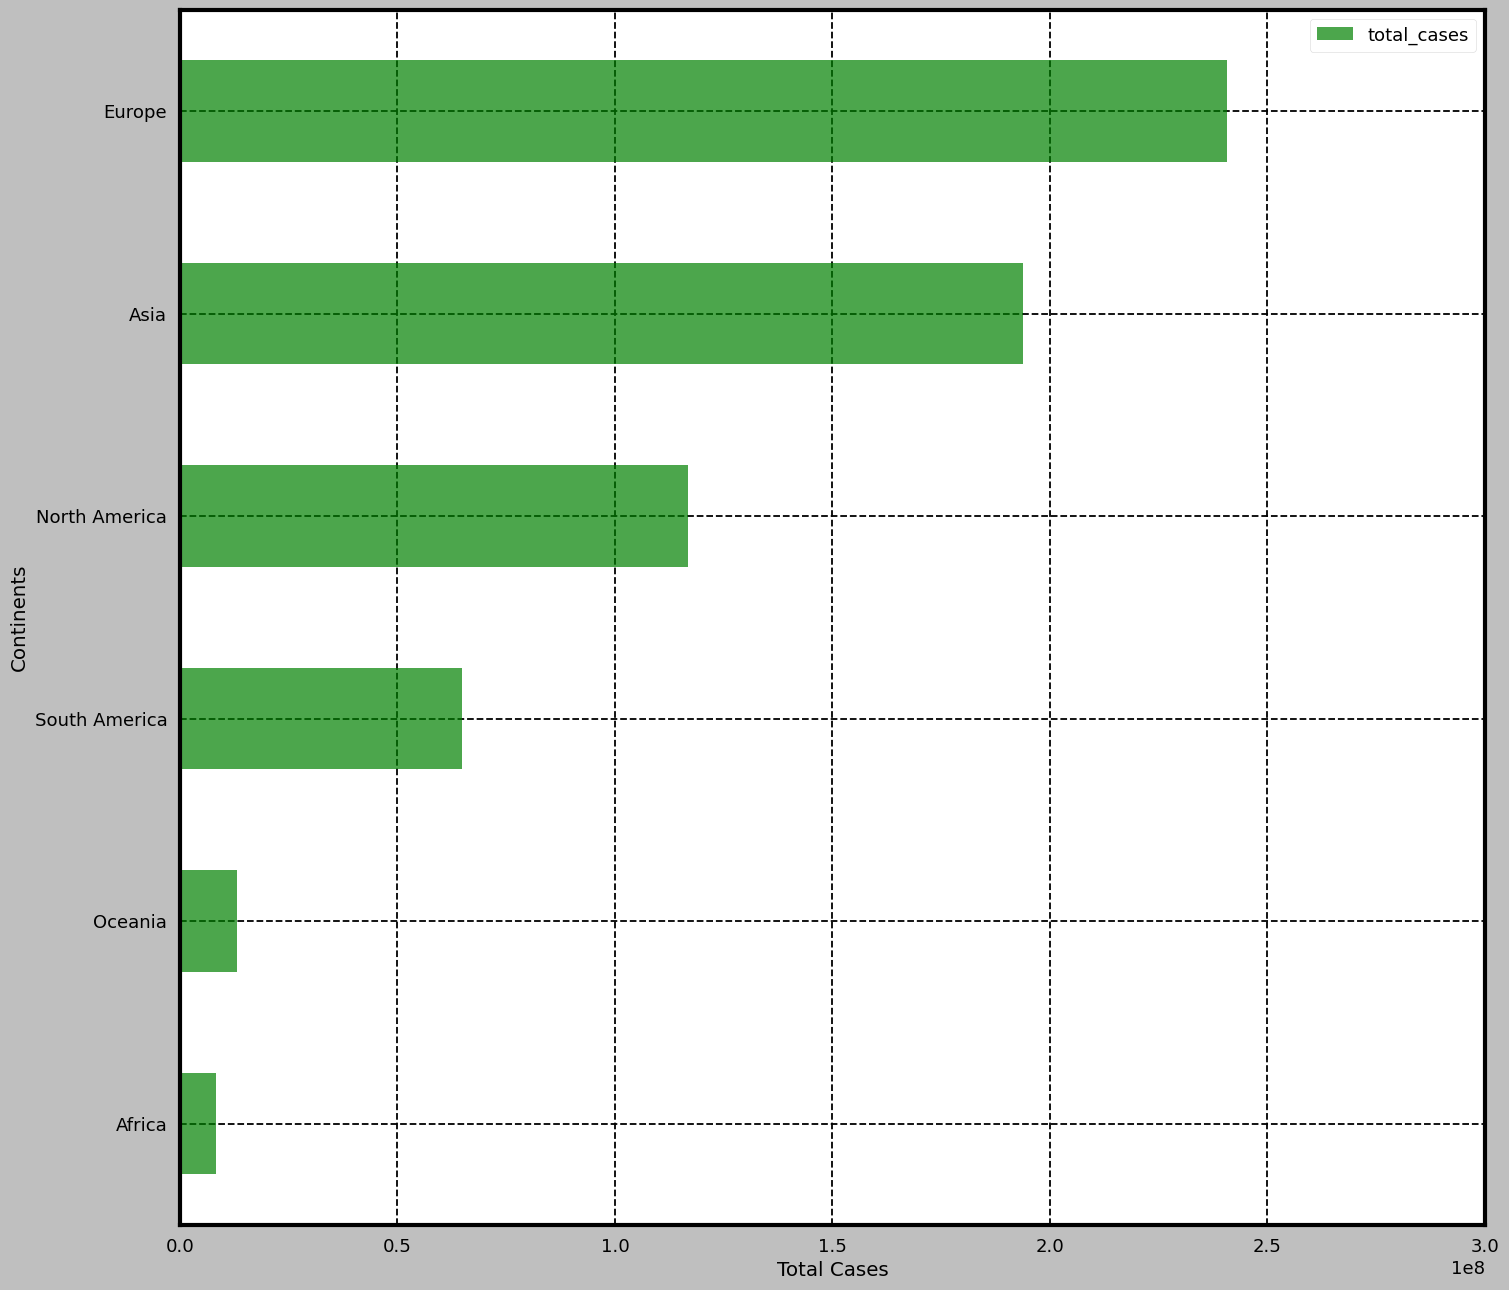

In [201]:
#plotting horizontal bar chart
horizontal_bar_chart=df_cases_total.plot.barh(figsize=(15,15),alpha=0.7,color='green')
#grids are added to the plot
plt.grid(True)
# new style is used
plt.style.use("fivethirtyeight")
# adjustments are done
horizontal_bar_chart.set(xlim=[0,3e8],ylabel='Continents',xlabel='Total Cases')


## 3.2.3 - Pie plot

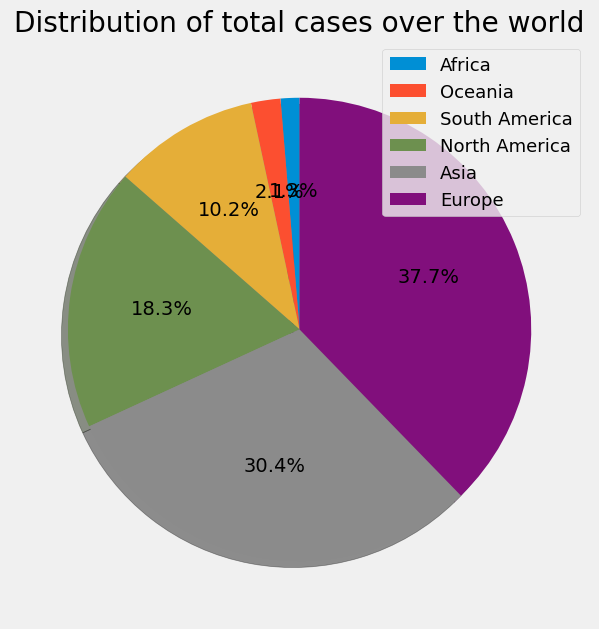

In [202]:
# new style is used
plt.style.use("fivethirtyeight")
# pie chart is created
plt.pie(df_cases_total['total_cases'],shadow=True,startangle=90,autopct='%1.1f%%')
# legend is added
plt.legend(df_cases_total.index)
# figure size is adjusted
plt.rcParams["figure.figsize"] = (15,15)
# relevant title is given
plt.title("Distribution of total cases over the world");


## 3.3 - Question 3

Here there are two questions to be answered: 
* How have new covid cases changed throughout the given period?
* How have death records changed throughout the given period?

## 3.3.1 - Line plot for Covid cases in Australia

In [203]:
# creating dataframe for covid data of Australia
covid_australia=covid_df[covid_df["location"]=="Australia"]


In [204]:
#plot with time series
# firstly we need to select relevant columns via using filter() method
covid_australia_cases=covid_australia.filter(["date","new_cases"])


In [205]:
#showing first 5 rows
covid_australia_cases.head()


,date,new_cases
12136,2020-01-26,4.0
12137,2020-01-27,1.0
12138,2020-01-28,0.0
12139,2020-01-29,1.0
12140,2020-01-30,3.0


In [206]:
#setting date column as index
covid_australia_cases=covid_australia_cases.set_index('date')


In [207]:
# available styles for editing our plots
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

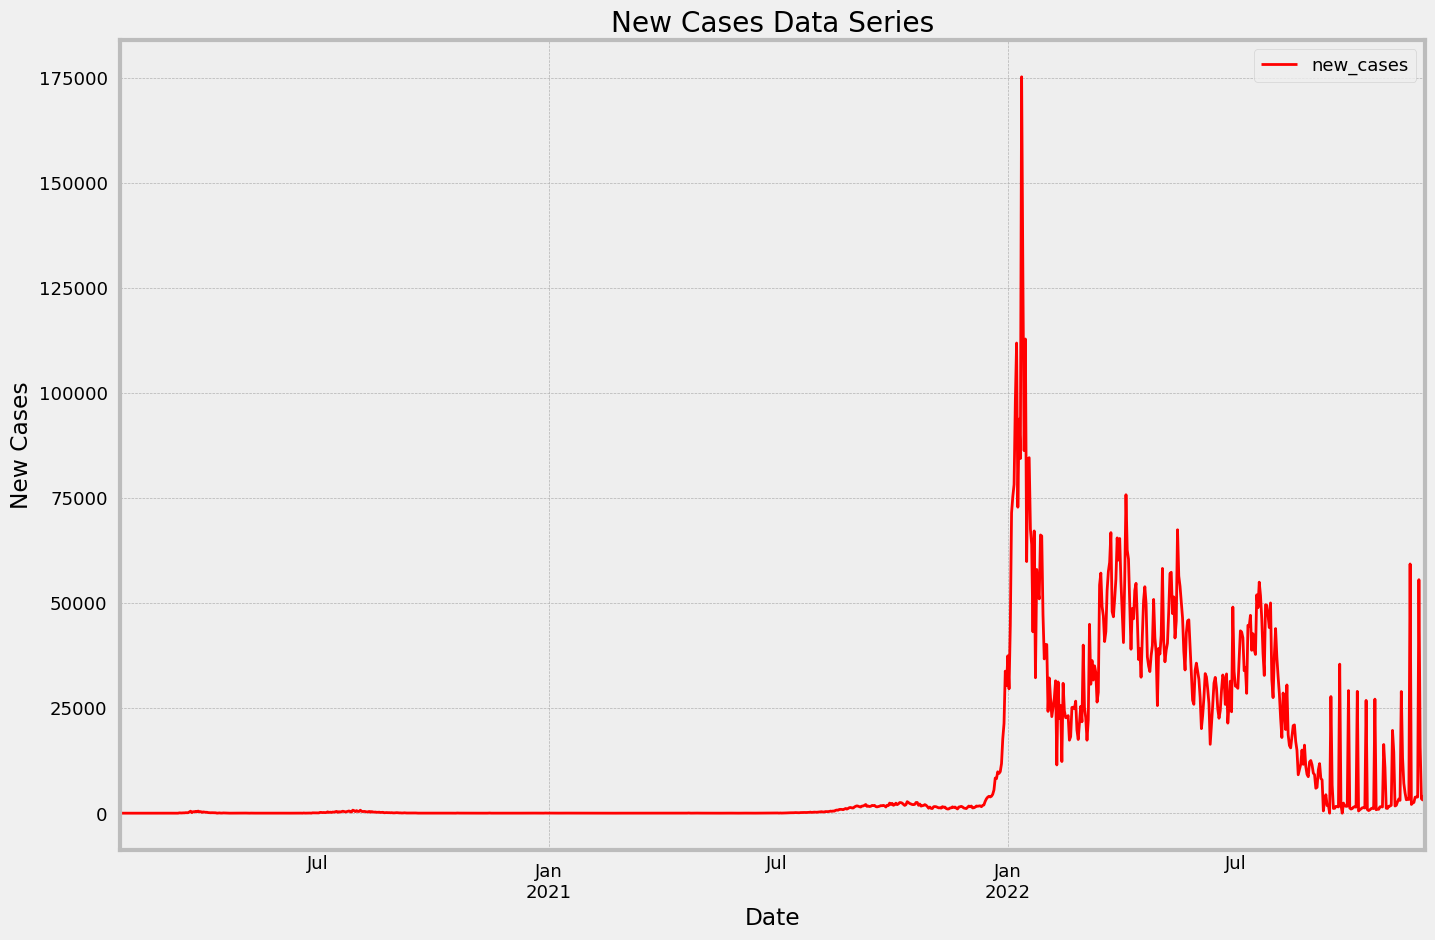

In [208]:
# new style is used
plt.style.use("bmh")
# line plot is plotted
line_plot=covid_australia_cases.plot.line(figsize=(15,10),color='red')
# appropriate labels and title are added
line_plot.set(xlabel='Date',ylabel='New Cases',title="New Cases Data Series");

**It is vivid that until the end of 2021 year the number of new cases were stable, which then peaked in January 2022 and fluctuated onwards**

## 3.3.2 - Line plot for death records in Australia

In [209]:
# dataframe is created containing death records
covid_australia_deaths=covid_australia.filter(['date','new_deaths'])
covid_australia_deaths


,date,new_deaths
12136,2020-01-26,1.0
12137,2020-01-27,1.0
12138,2020-01-28,1.0
12139,2020-01-29,1.0
12140,2020-01-30,1.0
...,...,...
13170,2022-11-25,25.0
13171,2022-11-26,0.0
13172,2022-11-27,0.0
13173,2022-11-28,19.0


In [210]:
# date column is shifted to be as index
covid_australia_deaths=covid_australia_deaths.set_index(['date'])


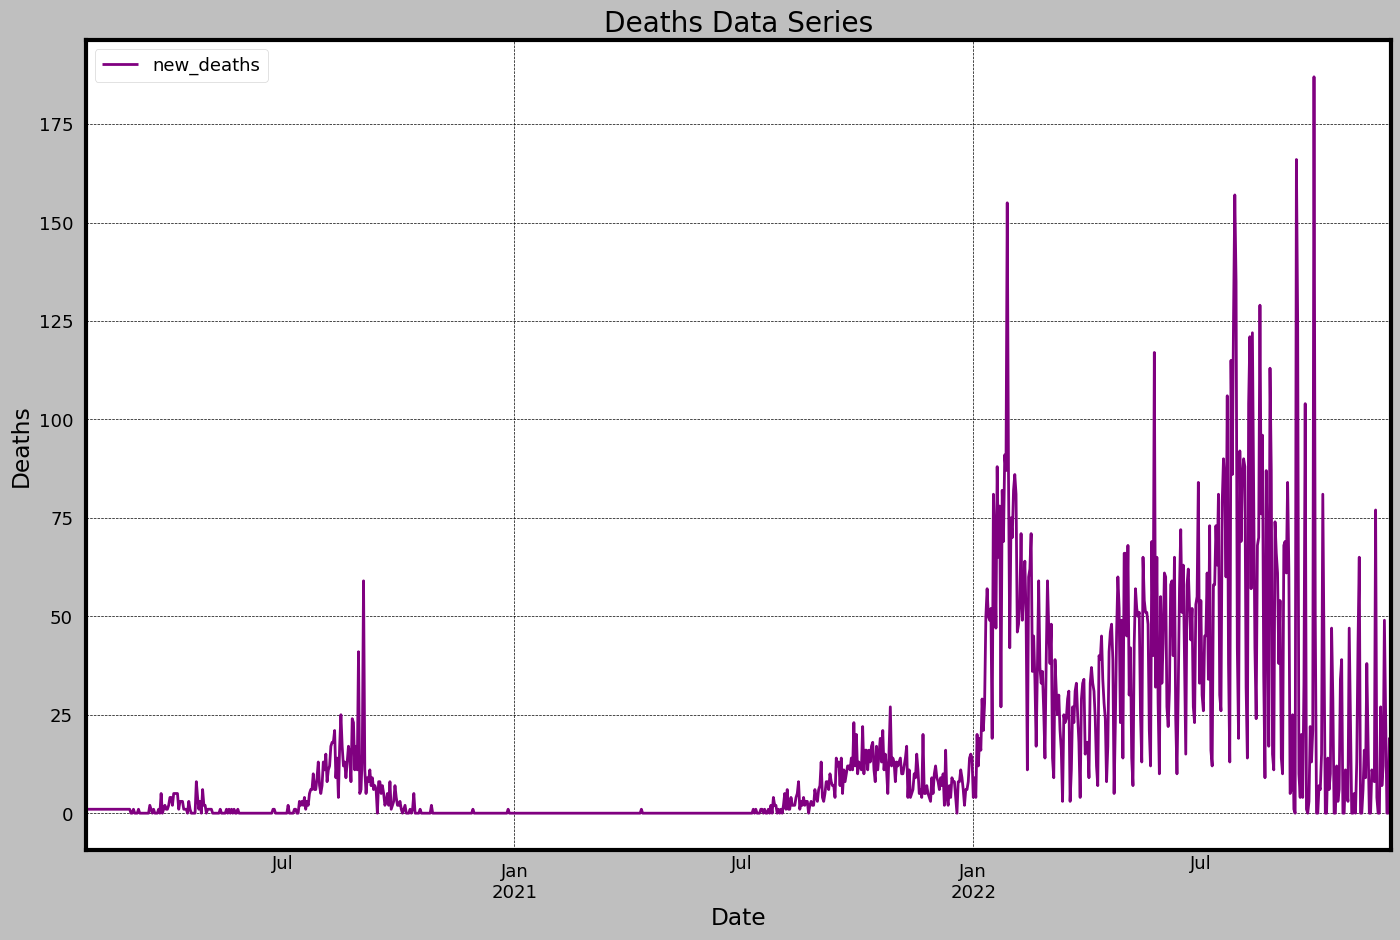

In [211]:
#new style is applied
plt.style.use("grayscale")
# line plot is created 
line_plot=covid_australia_deaths.plot.line(figsize=(15,10),color='purple')
# relevant labels and title are set
line_plot.set(xlabel='Date',ylabel='Deaths',title="Deaths Data Series");


**From the begining until January 2022 the figure for death fluctuated which then started to rise swiftly and reached the highest in August 2022**

# Conclusion for the third part

In this section, different plots were plotted to answer certain questions.

* 4.1 - In this part, we were looking for the names of countries where most number of deaths were recorded in each continent. Relevany methods and techniques were utilized to create dataframe showing where most number of deaths were recorded in each continent. 


* 4.2 - In this part, the question to anwswer is what was the total number of cases in each continent. In all three subsections , to visualise distribution of total cases across the world, bar plot, horizontal bar plot, and pie plot were plotted accordingly
* 4.3 - This part was mainly specified on new covid cases and deaths in Australia. Firstly, we created new dataframe to show covid records in Australia. Then in the first subsection, line plot was plotted show how new cases changed over the given period. Firstly , we filtered out 'data' and 'new_cases' column to make our visualisations easier and then plotted line plot. The same procedure was applied to the second subsection where line plot of deaths' record was plotted


# 4. Correlation

In [212]:
# correlation matrix is created with the help of .corr() method
covid_corr=covid_df.corr()
covid_corr

,total_cases,new_cases,new_deaths,total_deaths,hospital_beds_per_thousand,life_expectancy,human_development_index,population,male_smokers,female_smokers
total_cases,1.0,0.5,0.4,0.9,0.1,0.1,0.2,0.3,-0.0,0.1
new_cases,0.5,1.0,0.6,0.4,0.1,0.1,0.1,0.2,-0.0,0.1
new_deaths,0.4,0.6,1.0,0.5,0.0,0.1,0.1,0.3,-0.0,0.1
total_deaths,0.9,0.4,0.5,1.0,0.0,0.1,0.1,0.4,-0.0,0.1
hospital_beds_per_thousand,0.1,0.1,0.0,0.0,1.0,0.3,0.4,-0.0,0.1,0.3
life_expectancy,0.1,0.1,0.1,0.1,0.3,1.0,0.8,-0.0,0.1,0.3
human_development_index,0.2,0.1,0.1,0.1,0.4,0.8,1.0,-0.0,0.1,0.4
population,0.3,0.2,0.3,0.4,-0.0,-0.0,-0.0,1.0,0.0,-0.1
male_smokers,-0.0,-0.0,-0.0,-0.0,0.1,0.1,0.1,0.0,1.0,0.3
female_smokers,0.1,0.1,0.1,0.1,0.3,0.3,0.4,-0.1,0.3,1.0


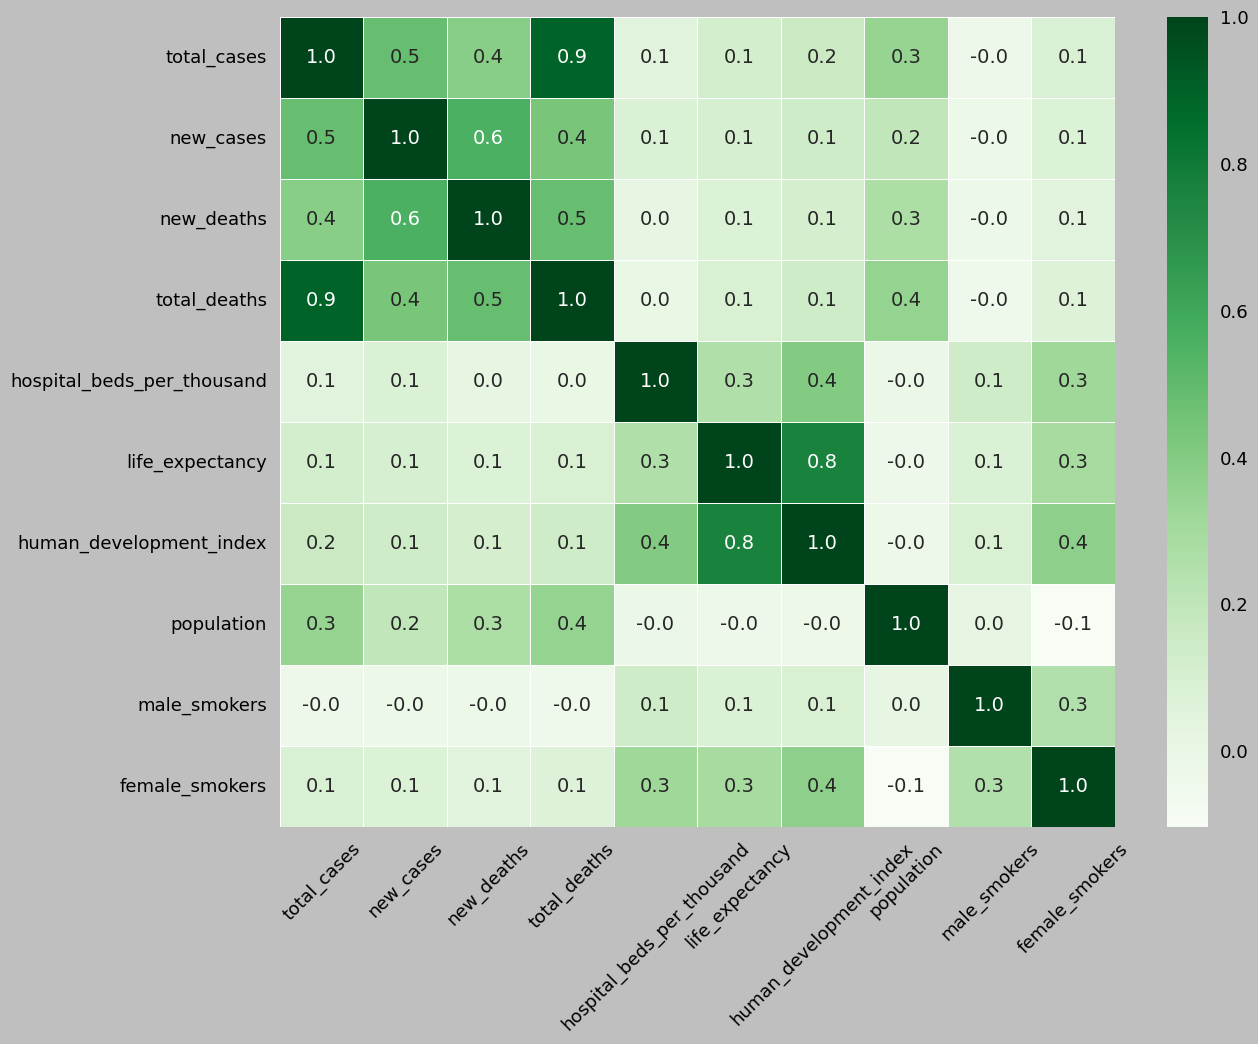

In [213]:
# figure size is set
plt.figure(figsize=(12,10))
# heatmap is plotted
chart = sns.heatmap(covid_corr, annot=True, fmt='.1f', linewidths=.6, cmap="Greens")
# appropriate adjustments are done
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);


# Conclusion for Correlation Part

Here,  we used our covid data that we created at the beginning to create a heatmap. This map basically shows how columns are related to each other. 1.0 value means that columns are exactly equal to each other , which makes sense. Positive values between two different columns, it means that there is a high potential to have positive correlation between those columns. For example, values of 'new_cases' column increase values of new_deaths are likely to increase. For negative values it works vice versa. 

# Supermarket sales 

## 1. Data loading and checking

In [214]:
# reading data into pandas dataframe
sales = pd.read_csv('supermarket_sales - Sheet1.csv')


In [215]:
#first five rows are shown
sales.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.7,7,26.1,549.0,1/5/2019,13:08,Ewallet,522.8,4.8,26.1,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.3,5,3.8,80.2,3/8/2019,10:29,Cash,76.4,4.8,3.8,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.3,7,16.2,340.5,3/3/2019,13:23,Credit card,324.3,4.8,16.2,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.2,8,23.3,489.0,1/27/2019,20:33,Ewallet,465.8,4.8,23.3,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.3,7,30.2,634.4,2/8/2019,10:37,Ewallet,604.2,4.8,30.2,5.3


In [216]:
#general information about dataypes and other parameters are shown via info() method
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [217]:
# then via using describe() method some values are shown such as mean value
covid_df.describe()

,total_cases,new_cases,new_deaths,total_deaths,hospital_beds_per_thousand,life_expectancy,human_development_index,population,male_smokers,female_smokers
count,224223.0,224223.0,224223.0,224223.0,224223.0,224223.0,224223.0,224223.0,224223.0,224223.0
mean,1106715.7,2844.4,29.2,16421.6,3.1,73.6,0.7,36375349.7,32.4,11.0
std,5050500.1,17459.4,154.8,69445.9,2.5,7.5,0.1,141696949.8,12.9,10.6
min,1.0,0.0,0.0,1.0,0.1,53.3,0.4,47.0,7.7,0.1
25%,2086.0,0.0,0.0,22.0,1.3,69.5,0.6,724272.0,22.7,2.0
50%,32205.0,22.0,1.0,415.0,2.5,75.0,0.7,6336393.0,31.2,6.4
75%,341951.5,523.0,6.0,5467.0,3.9,79.1,0.8,26069416.0,40.9,19.3
max,98673988.0,1355242.0,4529.0,1079870.0,13.8,86.8,1.0,1425887360.0,78.1,44.0


In [218]:
# we can also describe some values of columns having object dataype as following
covid_df.describe(include='O')

,continent,location
count,224223,224223
unique,6,234
top,Europe,Argentina
freq,54729,1064


# Conclusion for the first section

In this section , firstly file in csv format was read into a pandas dataframe, then first 10 and last 20 rows were shown. After this, by using .info() method information about the datatypes of each column was obtained. Finally with the help of .describe() function we acquired dataframe showing values such as mean, minimum, maximum and etc. then we again used describe function to get information about some key features of columns having object datatype. 

## 2. Data manipulation, cleaning and filtering
* can be done based on :
    * rows
    * columns

## 2.1 Checking and fixing the datatype of column

In [219]:
# it can be seen that our date column is not in date format, so we have to fix this
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [220]:

sales['date'] = pd.to_datetime(sales['Date'])

In [221]:
sales['date'].dtype


dtype('<M8[ns]')

In [222]:
# date column is shifted to date format
sales['date'] = pd.to_datetime(sales['date'])


In [223]:
#relevant adjustments are done
sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year
sales['Time'] = pd.to_datetime(sales['Time'])
sales['Hour'] = (sales['Time']).dt.hour    #type(sales['Time'])


In [224]:
sales.describe()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,55.7,5.5,15.4,323.0,307.6,4.8,15.4,7.0,15.3,2.0,2019.0,14.9
std,26.5,2.9,11.7,245.9,234.2,0.0,11.7,1.7,8.7,0.8,0.0,3.2
min,10.1,1.0,0.5,10.7,10.2,4.8,0.5,4.0,1.0,1.0,2019.0,10.0
25%,32.9,3.0,5.9,124.4,118.5,4.8,5.9,5.5,8.0,1.0,2019.0,12.0
50%,55.2,5.0,12.1,253.8,241.8,4.8,12.1,7.0,15.0,2.0,2019.0,15.0
75%,77.9,8.0,22.4,471.4,448.9,4.8,22.4,8.5,23.0,3.0,2019.0,18.0
max,100.0,10.0,49.6,1042.7,993.0,4.8,49.6,10.0,31.0,3.0,2019.0,20.0


## 2.2 Checking duplicates

Following methods must be used:
* .duplicated()
* .duplicated().sum()

In [225]:
sales.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [226]:
# checking the number of duplicates

sales.duplicated().sum()

0

## 2.3 Checking missing values

Following methods can be utilized:
* .isnull()    
* .isnull().sum()

In [227]:
# checking the  number of NaN values
sales.isnull().sum()


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
date                       0
day                        0
month                      0
year                       0
Hour                       0
dtype: int64

# Conclusion for the second part 

In this part, we mainly checked null values and duplicates and changed columns' data types to relevant format






* **Section 2.1** - It is very essential to shift the datatype of columns to appropriate format to plot graphs. In our dataframe, 'date' column was initally in 'object' datatype, so used .to_datetime() method change our datatype to 'date' format. 


* **Section 2.2** - Here , we checked if there are any duplicate rows. To do this, we use .duplicated().sum() method to show the number of duplicates. We found that, there was no duplicate values present. 



* **Section 2.3**- In this section, we mainly did work around dealing with missing values. Firstly, we used .isnull().sum() method to see how many missing values we do have in each column. We found that there was no NaN values

# 3. Visualisations

## 3.1 Bar plot
This plot illustrates , how many of each gender made a pruchase 

In [228]:
# showing first five rows
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.7,7,26.1,549.0,1/5/2019,2022-12-04 13:08:00,Ewallet,522.8,4.8,26.1,9.1,2019-01-05,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.3,5,3.8,80.2,3/8/2019,2022-12-04 10:29:00,Cash,76.4,4.8,3.8,9.6,2019-03-08,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.3,7,16.2,340.5,3/3/2019,2022-12-04 13:23:00,Credit card,324.3,4.8,16.2,7.4,2019-03-03,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.2,8,23.3,489.0,1/27/2019,2022-12-04 20:33:00,Ewallet,465.8,4.8,23.3,8.4,2019-01-27,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.3,7,30.2,634.4,2/8/2019,2022-12-04 10:37:00,Ewallet,604.2,4.8,30.2,5.3,2019-02-08,8,2,2019,10


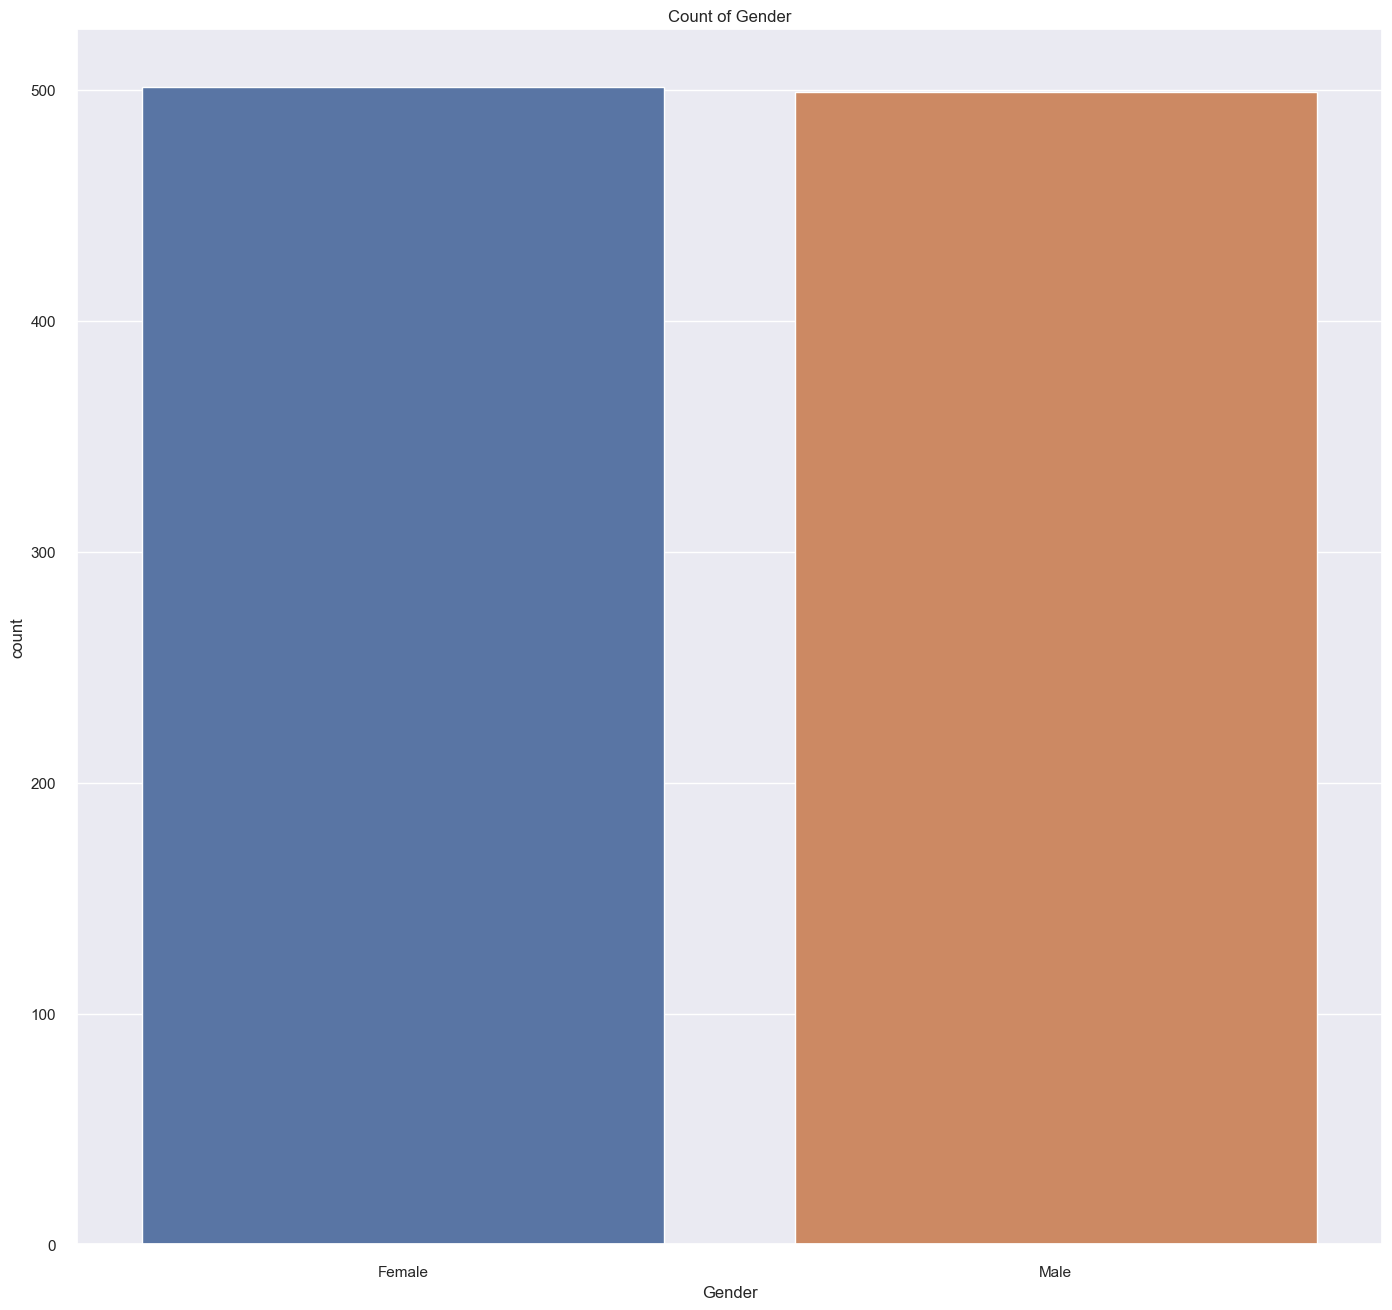

In [229]:
sns.set(style="darkgrid")     #style the plot background to become a grid
countofgender = sns.countplot(x="Gender", data =sales).set_title("Count of Gender");

## 3.2 Boxplot
This plot shows ratings of each branch in boxplot format

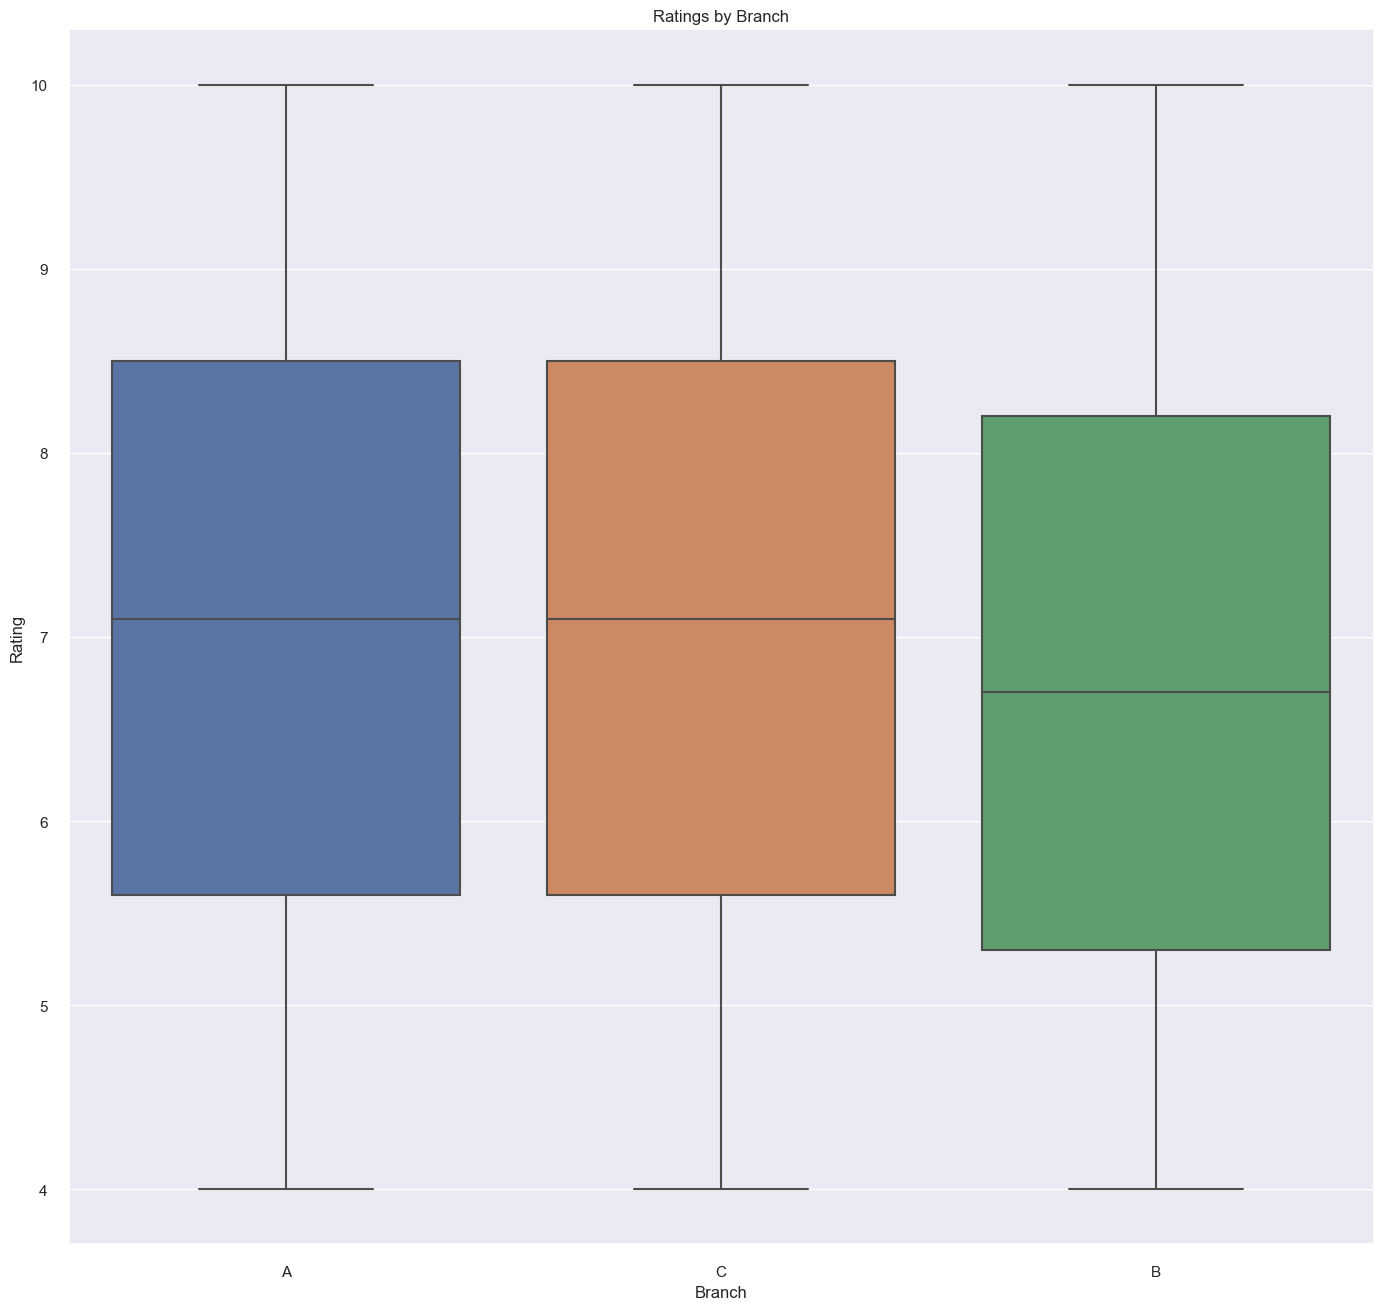

In [230]:
sns.boxplot(x="Branch", y = "Rating" ,data =sales).set_title("Ratings by Branch") ;

## 3.3 Lineplot
This plot shows the quantity of products sold each hour

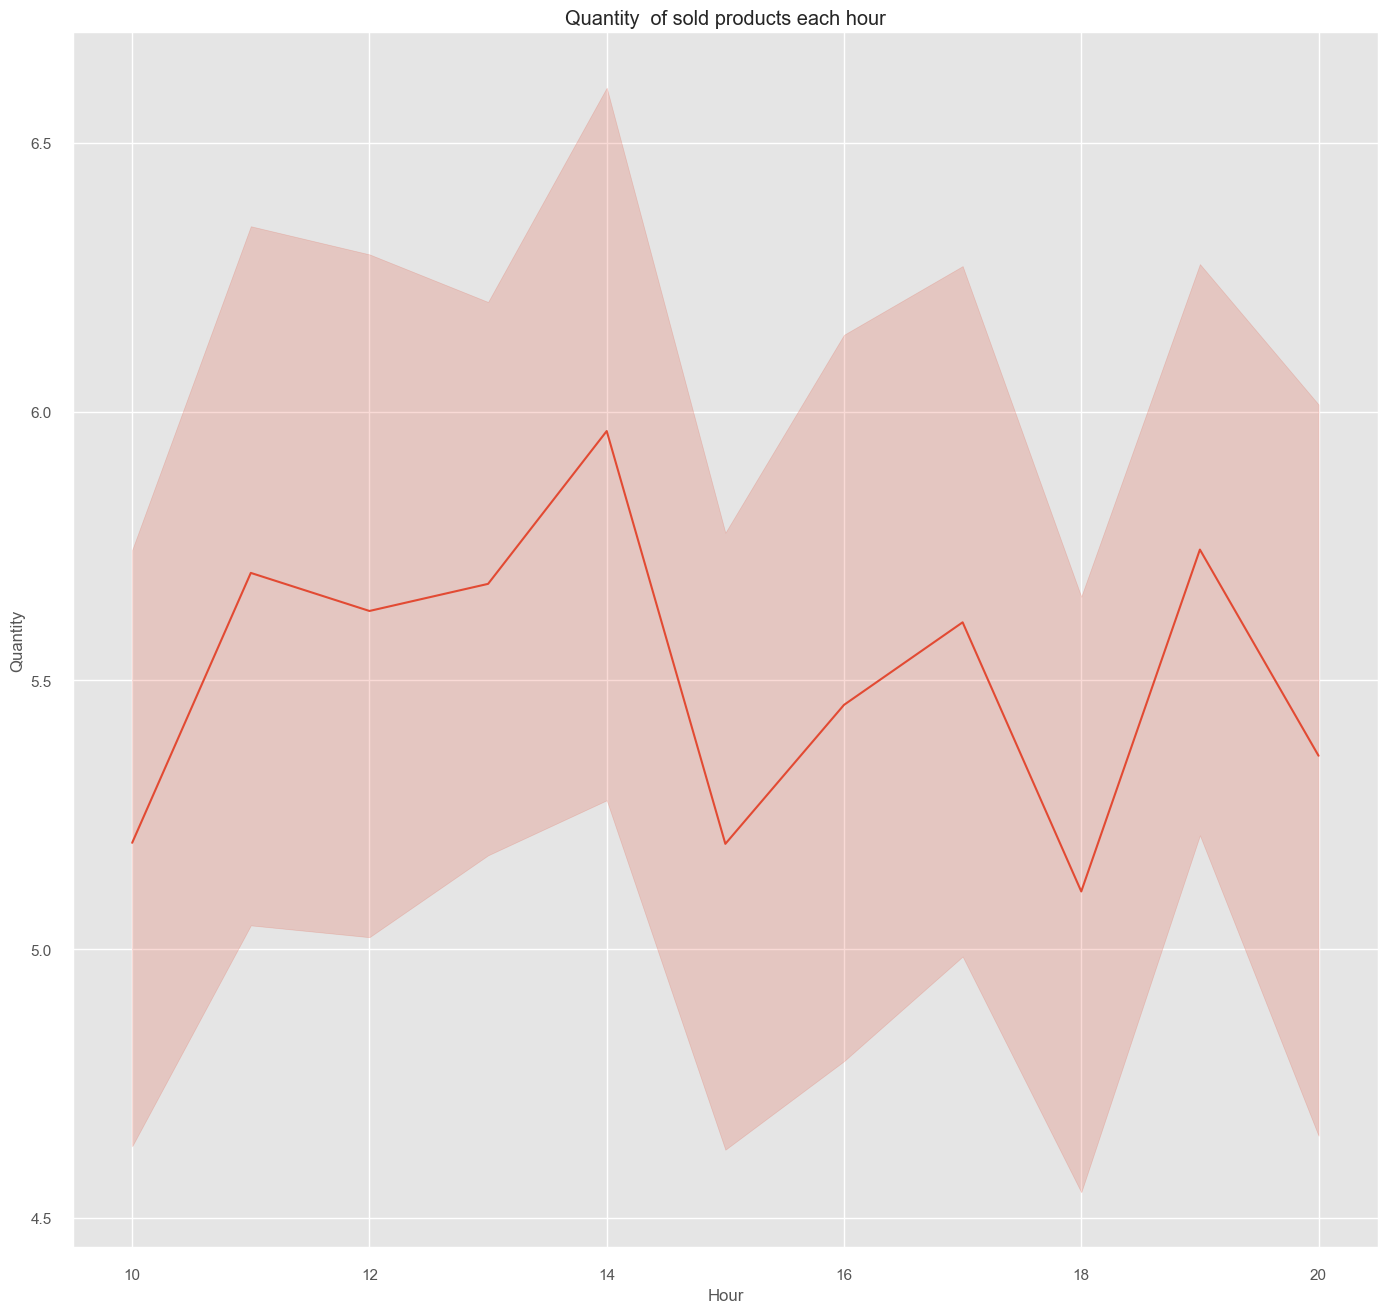

In [231]:
#changing style of our plot for looking better
plt.style.use('ggplot')

sales_line_plot = sns.lineplot(x="Hour",  y = 'Quantity',data =sales).set_title("Quantity  of sold products each hour")


In [232]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## 3.4 Multiple lineplot
**This plot shows how sales of each branch changed over three months separately**

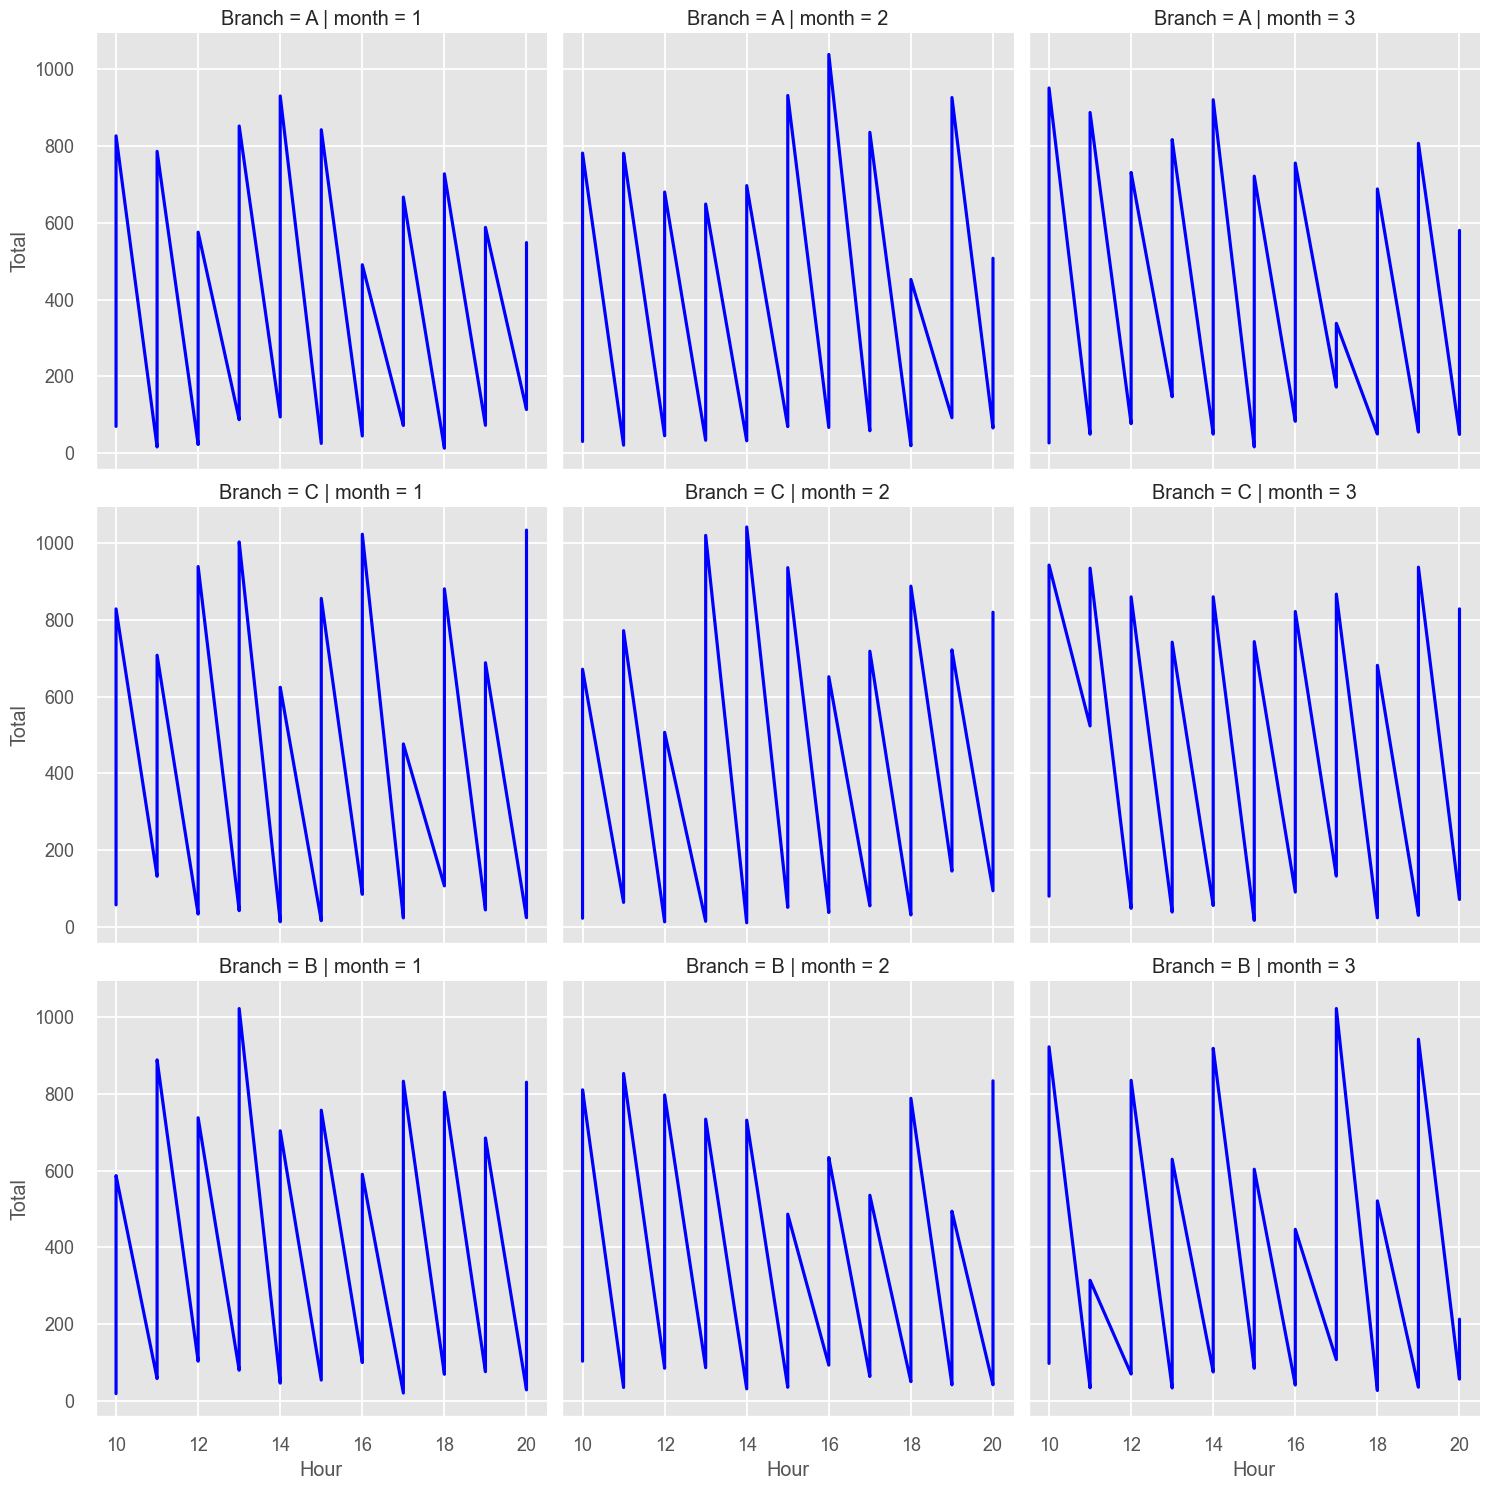

In [233]:
plt.style.use('seaborn-talk')
# setting appropriate figure size for clarification
plt.rcParams["figure.figsize"] = (15,15)

sales_data_all_branches  = sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =sales,color='blue')



## 3.5 Horizontal bar plot

Text(0.5, 1.0, 'How many of each product were shown in dataframe')

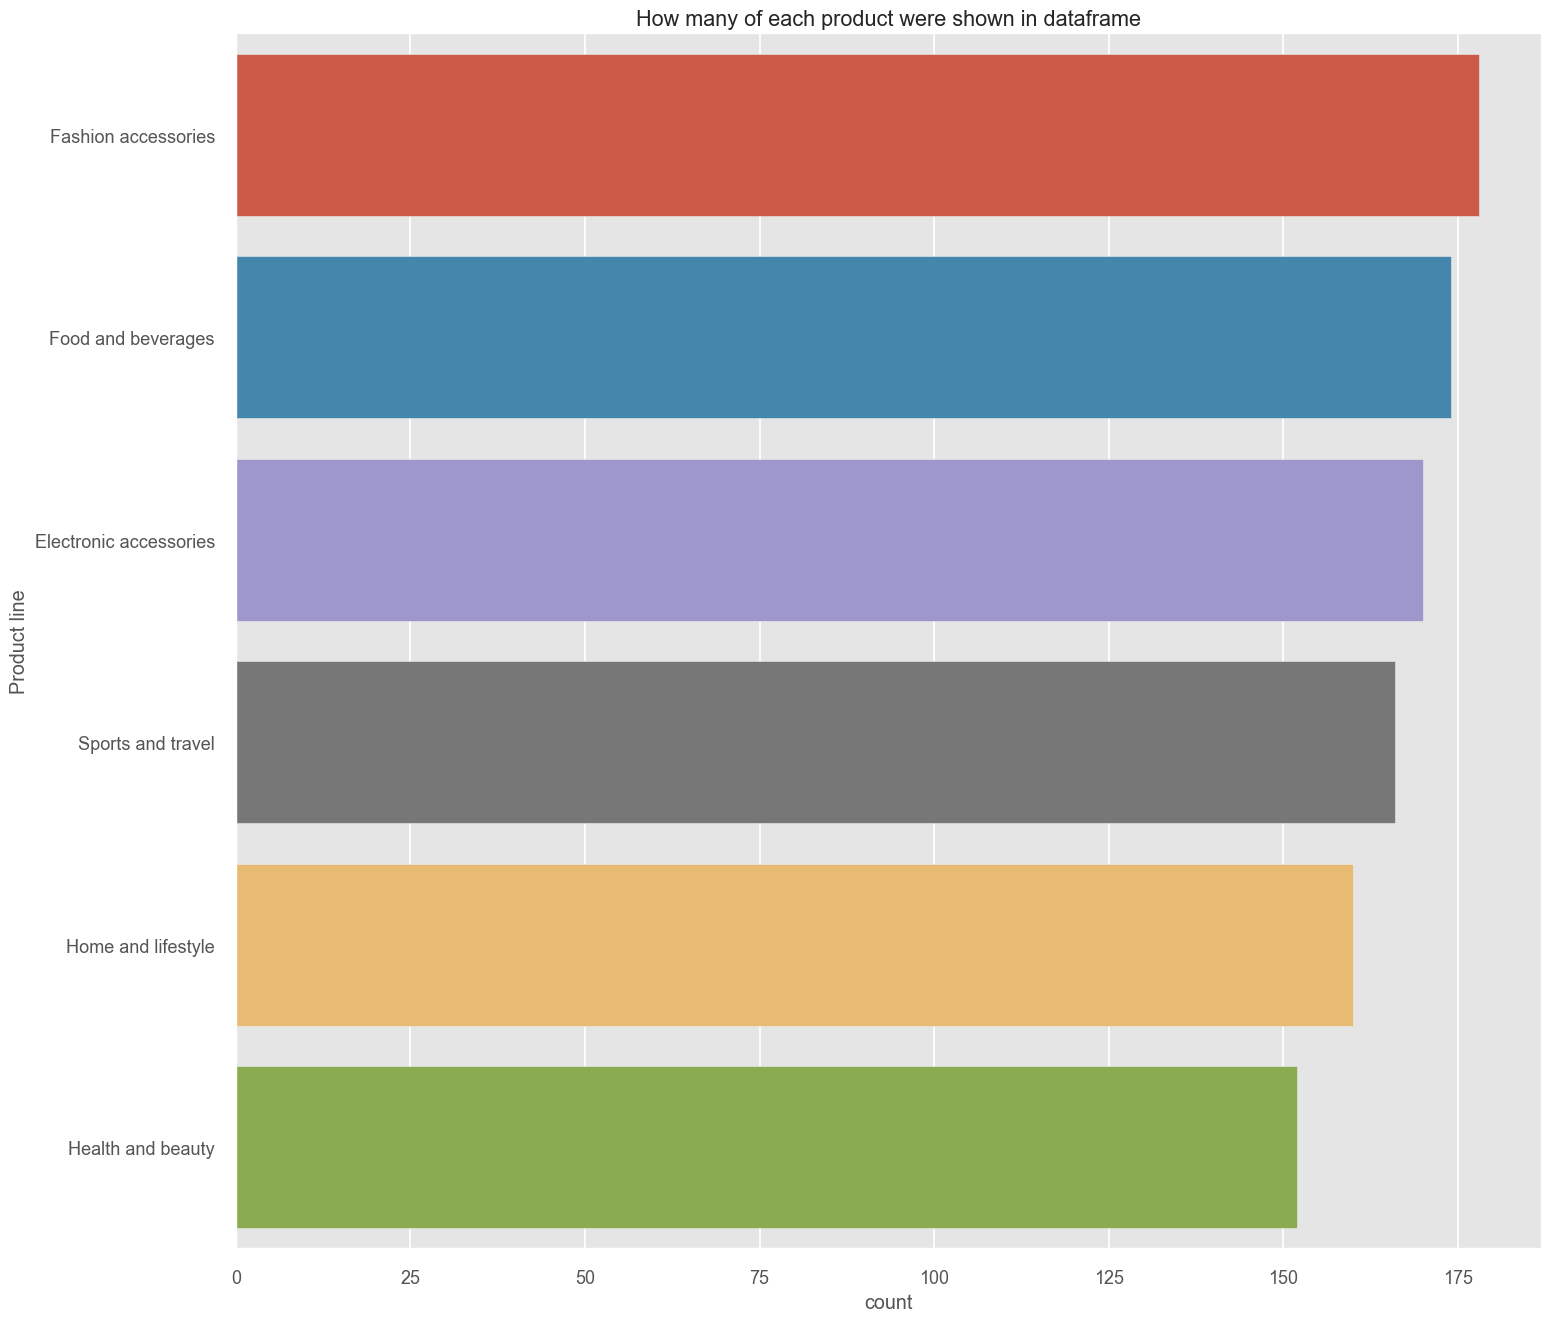

In [234]:
sns.countplot(y = 'Product line', data=sales, order = sales['Product line'].value_counts().index )
plt.title("How many of each product were shown in dataframe")

## 3.6 Scatter plot
**This plot shows relationship between Rating and Unit price of products 

Text(0.5, 1.0, 'Scatter plot of Unit price versus Rating')

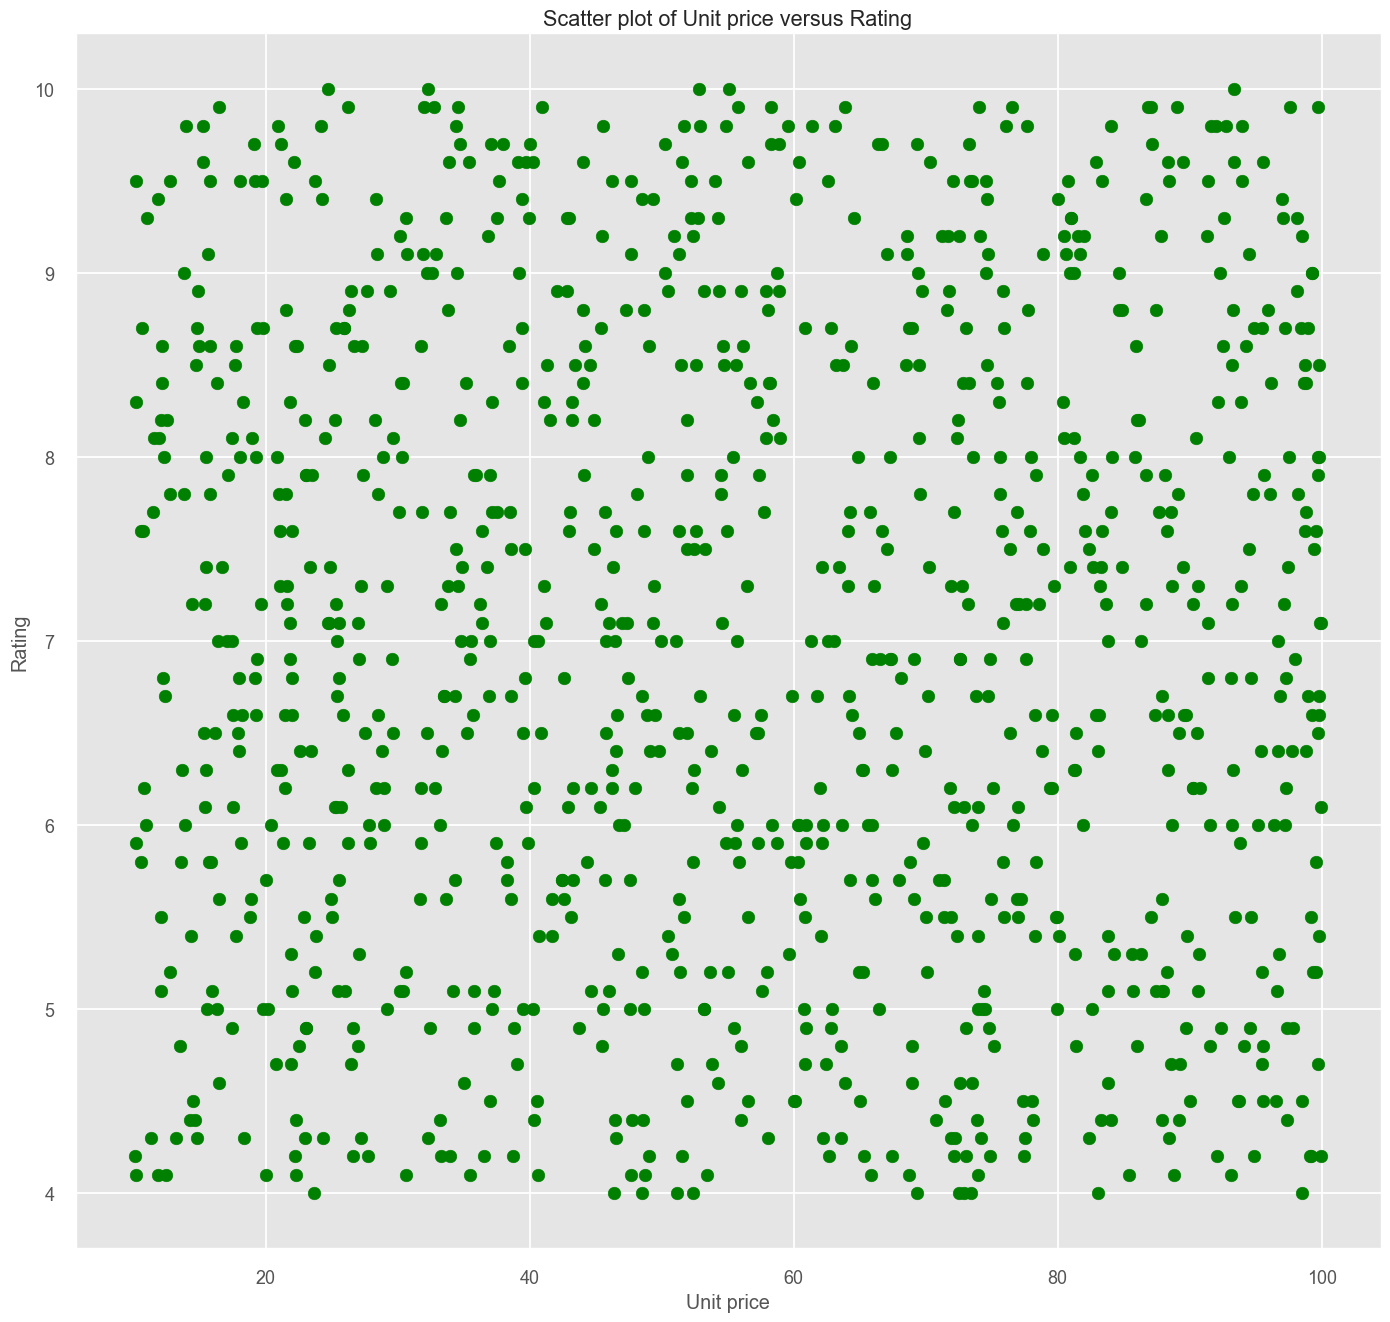

In [235]:
# we have to select data for each axis
plt.scatter(x=sales['Unit price'],y=sales['Rating'],color='green')

plt.xlabel('Unit price')
plt.ylabel('Rating')
plt.title("Scatter plot of Unit price versus Rating")
